In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH = 'C://Users/User/Desktop/'
df = pd.read_csv(PATH + 'epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


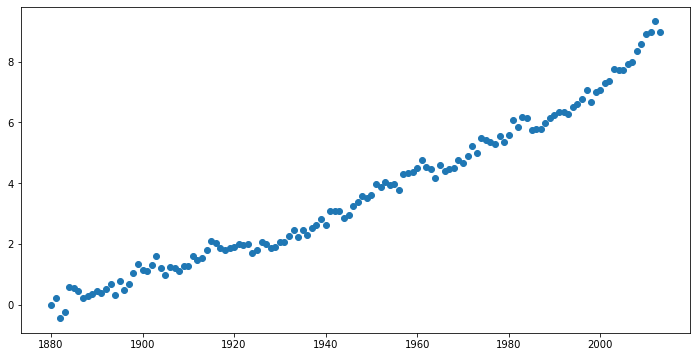

In [4]:
plt.figure(figsize= (12,6))
plt.scatter(data= df, x= 'Year', y= 'CSIRO Adjusted Sea Level')

In [22]:
from scipy.stats import linregress

model = linregress(x = df['Year'], y = df['CSIRO Adjusted Sea Level'] )
slope, intercept = model.slope, model.intercept

In [61]:
until_2050 = pd.Series([int(i) for i in range(1880, 2051)])

In [62]:
line = slope* until_2050 +intercept
line

0      -0.542124
1      -0.479079
2      -0.416035
3      -0.352990
4      -0.289946
         ...    
166     9.923277
167     9.986322
168    10.049366
169    10.112411
170    10.175455
Length: 171, dtype: float64

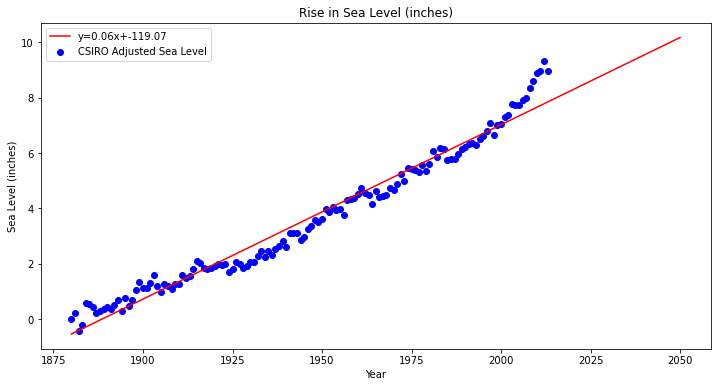

In [67]:
plt.figure(figsize= (12,6))

plt.scatter(data= df, x= 'Year', y= 'CSIRO Adjusted Sea Level', color= 'b')
plt.plot(until_2050, line, color= 'r', label= f"y={slope:.2f}x+{intercept:.2f}")
plt.legend(loc='best')

plt.title("Rise in Sea Level (inches)")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")

plt.show()

In [64]:
recent = df[ df['Year'] >= 2000]

new_model = linregress(x = recent['Year'], y = recent['CSIRO Adjusted Sea Level'] )
new_slope, new_intercept = new_model.slope, new_model.intercept

In [68]:
new_until_2050 = pd.Series([int(i) for i in range(2000, 2051)])
new_line = new_slope* new_until_2050 + new_intercept

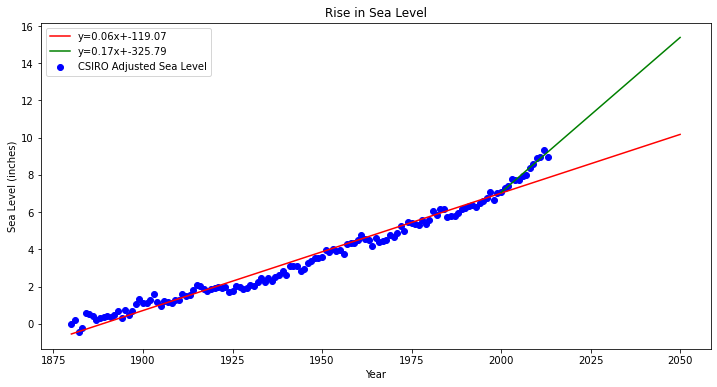

In [70]:
plt.figure(figsize= (12,6))

plt.scatter(data= df, x= 'Year', y= 'CSIRO Adjusted Sea Level', color= 'b')
plt.plot(until_2050, line, color= 'r', label= f"y={slope:.2f}x+{intercept:.2f}")
plt.plot(new_until_2050, new_line, color= 'g', label= f"y={new_slope:.2f}x+{new_intercept:.2f}")
plt.legend(loc='best')

plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")

plt.show()